In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

## Data Loading and Sentiment Analysis

In [2]:
cement_df = pd.read_csv('https://ibm.box.com/shared/static/svl8tu7cmod6tizo6rk0ke4sbuhtpdfx.csv')

In [3]:
cement_df.shape

(1030, 9)

In [8]:
trans = cement_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [16]:
cement_df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [18]:
cols = cement_df.columns

In [19]:
print(cols)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')


In [29]:
predictors, target = cement_df.iloc[:, :-1], cement_df.iloc[:,-1]

In [30]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

## Creating model

In [117]:
def linearmodel(hidden_layers, hidden_units, alpha):
    model = Sequential()
    
    for l in range(hidden_layers):
        if l == 0:
            model.add(Dense(hidden_units[0], activation = 'relu', input_shape = (len(cols)-1, )))
        else:
            model.add(Dense(hidden_units[l], activation = 'relu'))
    
    model.add(Dense(1))
    
    model.compile(optimizer = optimizers.Adam(lr = alpha), loss = 'mean_squared_error', metrics=['mean_absolute_error'])
    
    return model


In [132]:
linmodel = linearmodel(4, [20, 10, 5, 5], 0.01)

linmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_81 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_82 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_83 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 6         
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [133]:
hist = linmodel.fit(x = predictors, y = target, validation_split = 0.4, epochs = 1000, verbose = 1)

Train on 618 samples, validate on 412 samples
Epoch 1/1000
618/618 [==============================] - 1s 1ms/step - loss: 456.4957 - mean_absolute_error: 17.3434 - val_loss: 637.0696 - val_mean_absolute_error: 21.9213
Epoch 2/1000
618/618 [==============================] - 0s 92us/step - loss: 325.4322 - mean_absolute_error: 14.9043 - val_loss: 197.2600 - val_mean_absolute_error: 11.3086
Epoch 3/1000
618/618 [==============================] - 0s 141us/step - loss: 230.5269 - mean_absolute_error: 12.6678 - val_loss: 191.9627 - val_mean_absolute_error: 11.2573
Epoch 4/1000
618/618 [==============================] - 0s 102us/step - loss: 207.1487 - mean_absolute_error: 12.0651 - val_loss: 177.8031 - val_mean_absolute_error: 10.9502
Epoch 5/1000
618/618 [==============================] - 0s 136us/step - loss: 184.2372 - mean_absolute_error: 11.2255 - val_loss: 140.6106 - val_mean_absolute_error: 9.7181
Epoch 6/1000
618/618 [==============================] - 0s 123us/step - loss: 150.4646 -

618/618 [==============================] - 0s 118us/step - loss: 71.6385 - mean_absolute_error: 6.6703 - val_loss: 81.9515 - val_mean_absolute_error: 7.4269
Epoch 49/1000
618/618 [==============================] - 0s 116us/step - loss: 66.1357 - mean_absolute_error: 6.3602 - val_loss: 155.4636 - val_mean_absolute_error: 10.7038
Epoch 50/1000
618/618 [==============================] - 0s 118us/step - loss: 76.3463 - mean_absolute_error: 6.8832 - val_loss: 51.1922 - val_mean_absolute_error: 5.4650
Epoch 51/1000
618/618 [==============================] - 0s 105us/step - loss: 61.1624 - mean_absolute_error: 6.1737 - val_loss: 70.9025 - val_mean_absolute_error: 6.9270
Epoch 52/1000
618/618 [==============================] - 0s 134us/step - loss: 71.5715 - mean_absolute_error: 6.7165 - val_loss: 92.2944 - val_mean_absolute_error: 7.5221
Epoch 53/1000
618/618 [==============================] - 0s 115us/step - loss: 59.2047 - mean_absolute_error: 6.0046 - val_loss: 78.4909 - val_mean_absolute_

Epoch 96/1000
618/618 [==============================] - 0s 119us/step - loss: 59.4690 - mean_absolute_error: 6.0819 - val_loss: 56.9435 - val_mean_absolute_error: 5.7740
Epoch 97/1000
618/618 [==============================] - 0s 126us/step - loss: 58.0442 - mean_absolute_error: 6.0038 - val_loss: 73.5809 - val_mean_absolute_error: 6.6002
Epoch 98/1000
618/618 [==============================] - 0s 124us/step - loss: 58.7563 - mean_absolute_error: 5.9389 - val_loss: 49.8293 - val_mean_absolute_error: 5.4812
Epoch 99/1000
618/618 [==============================] - 0s 126us/step - loss: 53.5766 - mean_absolute_error: 5.6833 - val_loss: 76.1356 - val_mean_absolute_error: 6.6871
Epoch 100/1000
618/618 [==============================] - 0s 121us/step - loss: 58.5227 - mean_absolute_error: 5.8789 - val_loss: 51.1392 - val_mean_absolute_error: 5.6208
Epoch 101/1000
618/618 [==============================] - 0s 100us/step - loss: 51.5626 - mean_absolute_error: 5.6563 - val_loss: 56.3424 - val_

618/618 [==============================] - 0s 121us/step - loss: 48.2255 - mean_absolute_error: 5.4183 - val_loss: 59.7422 - val_mean_absolute_error: 6.0581
Epoch 144/1000
618/618 [==============================] - 0s 97us/step - loss: 44.6643 - mean_absolute_error: 5.1895 - val_loss: 72.9757 - val_mean_absolute_error: 6.3346
Epoch 145/1000
618/618 [==============================] - 0s 109us/step - loss: 46.5524 - mean_absolute_error: 5.2430 - val_loss: 61.8131 - val_mean_absolute_error: 5.9069
Epoch 146/1000
618/618 [==============================] - 0s 134us/step - loss: 45.9425 - mean_absolute_error: 5.1177 - val_loss: 73.6946 - val_mean_absolute_error: 6.5315
Epoch 147/1000
618/618 [==============================] - 0s 106us/step - loss: 48.6115 - mean_absolute_error: 5.4289 - val_loss: 65.4678 - val_mean_absolute_error: 6.1546
Epoch 148/1000
618/618 [==============================] - 0s 108us/step - loss: 62.9505 - mean_absolute_error: 6.0875 - val_loss: 104.9141 - val_mean_absolu

Epoch 191/1000
618/618 [==============================] - 0s 90us/step - loss: 48.5753 - mean_absolute_error: 5.2780 - val_loss: 74.8480 - val_mean_absolute_error: 6.7266
Epoch 192/1000
618/618 [==============================] - 0s 137us/step - loss: 38.3476 - mean_absolute_error: 4.7537 - val_loss: 73.1544 - val_mean_absolute_error: 6.6690
Epoch 193/1000
618/618 [==============================] - 0s 105us/step - loss: 41.4610 - mean_absolute_error: 4.9070 - val_loss: 64.7613 - val_mean_absolute_error: 6.1865
Epoch 194/1000
618/618 [==============================] - 0s 109us/step - loss: 37.4740 - mean_absolute_error: 4.6254 - val_loss: 116.3651 - val_mean_absolute_error: 8.7728
Epoch 195/1000
618/618 [==============================] - 0s 110us/step - loss: 39.0167 - mean_absolute_error: 4.8203 - val_loss: 69.3974 - val_mean_absolute_error: 6.5499
Epoch 196/1000
618/618 [==============================] - 0s 132us/step - loss: 42.9654 - mean_absolute_error: 4.9787 - val_loss: 111.6916 -

618/618 [==============================] - 0s 126us/step - loss: 34.5537 - mean_absolute_error: 4.3615 - val_loss: 97.5301 - val_mean_absolute_error: 7.8730
Epoch 239/1000
618/618 [==============================] - 0s 115us/step - loss: 35.7958 - mean_absolute_error: 4.5002 - val_loss: 66.6839 - val_mean_absolute_error: 6.4629
Epoch 240/1000
618/618 [==============================] - 0s 108us/step - loss: 36.6219 - mean_absolute_error: 4.6315 - val_loss: 71.3996 - val_mean_absolute_error: 6.5909
Epoch 241/1000
618/618 [==============================] - 0s 108us/step - loss: 45.0547 - mean_absolute_error: 5.0331 - val_loss: 63.9705 - val_mean_absolute_error: 6.1467
Epoch 242/1000
618/618 [==============================] - 0s 109us/step - loss: 35.2122 - mean_absolute_error: 4.5118 - val_loss: 78.6416 - val_mean_absolute_error: 7.0274
Epoch 243/1000
618/618 [==============================] - 0s 143us/step - loss: 32.5971 - mean_absolute_error: 4.3830 - val_loss: 94.2718 - val_mean_absolu

Epoch 286/1000
618/618 [==============================] - 0s 116us/step - loss: 33.3264 - mean_absolute_error: 4.2841 - val_loss: 101.7869 - val_mean_absolute_error: 7.8522
Epoch 287/1000
618/618 [==============================] - 0s 98us/step - loss: 42.4932 - mean_absolute_error: 5.0583 - val_loss: 88.1000 - val_mean_absolute_error: 7.2978
Epoch 288/1000
618/618 [==============================] - 0s 141us/step - loss: 36.7040 - mean_absolute_error: 4.6103 - val_loss: 72.9142 - val_mean_absolute_error: 6.5291
Epoch 289/1000
618/618 [==============================] - 0s 102us/step - loss: 29.6018 - mean_absolute_error: 4.0578 - val_loss: 70.6875 - val_mean_absolute_error: 6.4259
Epoch 290/1000
618/618 [==============================] - 0s 129us/step - loss: 34.3211 - mean_absolute_error: 4.3875 - val_loss: 117.6415 - val_mean_absolute_error: 8.4200
Epoch 291/1000
618/618 [==============================] - 0s 115us/step - loss: 33.0106 - mean_absolute_error: 4.2982 - val_loss: 69.7080 -

618/618 [==============================] - 0s 124us/step - loss: 43.1818 - mean_absolute_error: 5.0281 - val_loss: 93.2179 - val_mean_absolute_error: 7.1872
Epoch 334/1000
618/618 [==============================] - 0s 121us/step - loss: 34.0090 - mean_absolute_error: 4.4761 - val_loss: 84.0302 - val_mean_absolute_error: 6.9110
Epoch 335/1000
618/618 [==============================] - 0s 110us/step - loss: 30.7319 - mean_absolute_error: 4.2152 - val_loss: 74.5663 - val_mean_absolute_error: 6.5337
Epoch 336/1000
618/618 [==============================] - 0s 107us/step - loss: 30.3202 - mean_absolute_error: 4.1564 - val_loss: 84.1287 - val_mean_absolute_error: 7.0228
Epoch 337/1000
618/618 [==============================] - 0s 93us/step - loss: 32.3679 - mean_absolute_error: 4.4134 - val_loss: 84.1955 - val_mean_absolute_error: 6.9777
Epoch 338/1000
618/618 [==============================] - 0s 131us/step - loss: 33.6720 - mean_absolute_error: 4.4076 - val_loss: 90.1200 - val_mean_absolut

Epoch 381/1000
618/618 [==============================] - 0s 129us/step - loss: 30.9974 - mean_absolute_error: 4.2011 - val_loss: 79.2796 - val_mean_absolute_error: 6.8092
Epoch 382/1000
618/618 [==============================] - 0s 124us/step - loss: 40.2736 - mean_absolute_error: 4.8314 - val_loss: 72.3995 - val_mean_absolute_error: 6.4314
Epoch 383/1000
618/618 [==============================] - 0s 103us/step - loss: 38.0349 - mean_absolute_error: 4.7458 - val_loss: 99.5306 - val_mean_absolute_error: 7.6767
Epoch 384/1000
618/618 [==============================] - 0s 144us/step - loss: 34.2329 - mean_absolute_error: 4.5663 - val_loss: 78.3968 - val_mean_absolute_error: 6.6000
Epoch 385/1000
618/618 [==============================] - 0s 121us/step - loss: 28.3511 - mean_absolute_error: 4.0413 - val_loss: 85.6491 - val_mean_absolute_error: 6.9024
Epoch 386/1000
618/618 [==============================] - 0s 127us/step - loss: 34.8491 - mean_absolute_error: 4.5537 - val_loss: 71.8757 - 

618/618 [==============================] - 0s 124us/step - loss: 30.5233 - mean_absolute_error: 4.2145 - val_loss: 68.0163 - val_mean_absolute_error: 6.1341
Epoch 429/1000
618/618 [==============================] - 0s 124us/step - loss: 29.6064 - mean_absolute_error: 4.0911 - val_loss: 69.0545 - val_mean_absolute_error: 6.2628
Epoch 430/1000
618/618 [==============================] - 0s 126us/step - loss: 27.4009 - mean_absolute_error: 3.9482 - val_loss: 84.3982 - val_mean_absolute_error: 6.9077
Epoch 431/1000
618/618 [==============================] - 0s 116us/step - loss: 29.8023 - mean_absolute_error: 4.1379 - val_loss: 84.2683 - val_mean_absolute_error: 6.8628
Epoch 432/1000
618/618 [==============================] - 0s 115us/step - loss: 31.3503 - mean_absolute_error: 4.2880 - val_loss: 89.9632 - val_mean_absolute_error: 7.3285
Epoch 433/1000
618/618 [==============================] - 0s 118us/step - loss: 29.5390 - mean_absolute_error: 4.1010 - val_loss: 78.3916 - val_mean_absolu

Epoch 476/1000
618/618 [==============================] - 0s 102us/step - loss: 27.1413 - mean_absolute_error: 3.9213 - val_loss: 78.5419 - val_mean_absolute_error: 6.6519
Epoch 477/1000
618/618 [==============================] - 0s 122us/step - loss: 30.4667 - mean_absolute_error: 4.1156 - val_loss: 85.6478 - val_mean_absolute_error: 6.8272
Epoch 478/1000
618/618 [==============================] - 0s 128us/step - loss: 26.7971 - mean_absolute_error: 3.9821 - val_loss: 67.6800 - val_mean_absolute_error: 6.1784
Epoch 479/1000
618/618 [==============================] - 0s 113us/step - loss: 31.6304 - mean_absolute_error: 4.2394 - val_loss: 93.9499 - val_mean_absolute_error: 7.4067
Epoch 480/1000
618/618 [==============================] - 0s 116us/step - loss: 32.6746 - mean_absolute_error: 4.3883 - val_loss: 70.9452 - val_mean_absolute_error: 6.2473
Epoch 481/1000
618/618 [==============================] - 0s 127us/step - loss: 27.8378 - mean_absolute_error: 3.9454 - val_loss: 74.5199 - 

Epoch 524/1000
618/618 [==============================] - 0s 115us/step - loss: 33.2540 - mean_absolute_error: 4.4540 - val_loss: 74.6005 - val_mean_absolute_error: 6.4301
Epoch 525/1000
618/618 [==============================] - 0s 103us/step - loss: 29.1238 - mean_absolute_error: 4.1426 - val_loss: 75.1836 - val_mean_absolute_error: 6.7565
Epoch 526/1000
618/618 [==============================] - 0s 122us/step - loss: 38.7630 - mean_absolute_error: 4.8817 - val_loss: 89.7518 - val_mean_absolute_error: 7.2533
Epoch 527/1000
618/618 [==============================] - 0s 115us/step - loss: 29.3367 - mean_absolute_error: 4.0850 - val_loss: 81.6950 - val_mean_absolute_error: 6.6775
Epoch 528/1000
618/618 [==============================] - 0s 113us/step - loss: 25.2992 - mean_absolute_error: 3.7436 - val_loss: 78.6062 - val_mean_absolute_error: 6.5925
Epoch 529/1000
618/618 [==============================] - 0s 103us/step - loss: 26.8848 - mean_absolute_error: 3.9113 - val_loss: 83.2036 - 

618/618 [==============================] - 0s 93us/step - loss: 28.3052 - mean_absolute_error: 4.0804 - val_loss: 74.9190 - val_mean_absolute_error: 6.5940
Epoch 572/1000
618/618 [==============================] - 0s 130us/step - loss: 29.2142 - mean_absolute_error: 3.9938 - val_loss: 99.9170 - val_mean_absolute_error: 7.6708
Epoch 573/1000
618/618 [==============================] - 0s 110us/step - loss: 27.6383 - mean_absolute_error: 3.9357 - val_loss: 81.0885 - val_mean_absolute_error: 6.7067
Epoch 574/1000
618/618 [==============================] - 0s 108us/step - loss: 25.5632 - mean_absolute_error: 3.8373 - val_loss: 98.5344 - val_mean_absolute_error: 7.7641
Epoch 575/1000
618/618 [==============================] - 0s 109us/step - loss: 30.4737 - mean_absolute_error: 4.0857 - val_loss: 85.2473 - val_mean_absolute_error: 6.9522
Epoch 576/1000
618/618 [==============================] - 0s 121us/step - loss: 26.2485 - mean_absolute_error: 3.7812 - val_loss: 80.6363 - val_mean_absolut

Epoch 619/1000
618/618 [==============================] - 0s 114us/step - loss: 23.4835 - mean_absolute_error: 3.6841 - val_loss: 90.6497 - val_mean_absolute_error: 7.2441
Epoch 620/1000
618/618 [==============================] - 0s 108us/step - loss: 27.2687 - mean_absolute_error: 3.9495 - val_loss: 76.4371 - val_mean_absolute_error: 6.6016
Epoch 621/1000
618/618 [==============================] - 0s 117us/step - loss: 32.8324 - mean_absolute_error: 4.4379 - val_loss: 75.2704 - val_mean_absolute_error: 6.6195
Epoch 622/1000
618/618 [==============================] - 0s 116us/step - loss: 26.2080 - mean_absolute_error: 3.9430 - val_loss: 98.1336 - val_mean_absolute_error: 7.7189
Epoch 623/1000
618/618 [==============================] - 0s 117us/step - loss: 25.8713 - mean_absolute_error: 3.8536 - val_loss: 89.2164 - val_mean_absolute_error: 7.4002
Epoch 624/1000
618/618 [==============================] - 0s 103us/step - loss: 27.6528 - mean_absolute_error: 4.0032 - val_loss: 71.7348 - 

Epoch 667/1000
618/618 [==============================] - 0s 126us/step - loss: 23.7711 - mean_absolute_error: 3.6544 - val_loss: 81.3910 - val_mean_absolute_error: 6.8344
Epoch 668/1000
618/618 [==============================] - 0s 116us/step - loss: 23.4844 - mean_absolute_error: 3.6086 - val_loss: 97.8575 - val_mean_absolute_error: 7.5789
Epoch 669/1000
618/618 [==============================] - 0s 108us/step - loss: 26.1086 - mean_absolute_error: 3.9288 - val_loss: 84.6588 - val_mean_absolute_error: 6.9721
Epoch 670/1000
618/618 [==============================] - 0s 107us/step - loss: 24.2016 - mean_absolute_error: 3.6061 - val_loss: 73.1381 - val_mean_absolute_error: 6.4633
Epoch 671/1000
618/618 [==============================] - 0s 108us/step - loss: 22.4320 - mean_absolute_error: 3.5980 - val_loss: 75.7546 - val_mean_absolute_error: 6.5054
Epoch 672/1000
618/618 [==============================] - 0s 108us/step - loss: 22.9497 - mean_absolute_error: 3.6510 - val_loss: 76.6297 - 

618/618 [==============================] - 0s 115us/step - loss: 30.8710 - mean_absolute_error: 4.2982 - val_loss: 79.5709 - val_mean_absolute_error: 6.7825
Epoch 715/1000
618/618 [==============================] - 0s 115us/step - loss: 28.7582 - mean_absolute_error: 4.0939 - val_loss: 91.2377 - val_mean_absolute_error: 7.1423
Epoch 716/1000
618/618 [==============================] - 0s 113us/step - loss: 23.4357 - mean_absolute_error: 3.6236 - val_loss: 82.6897 - val_mean_absolute_error: 6.9623
Epoch 717/1000
618/618 [==============================] - 0s 115us/step - loss: 23.4018 - mean_absolute_error: 3.7253 - val_loss: 98.4897 - val_mean_absolute_error: 7.5943
Epoch 718/1000
618/618 [==============================] - 0s 115us/step - loss: 24.4967 - mean_absolute_error: 3.7486 - val_loss: 74.5945 - val_mean_absolute_error: 6.4684
Epoch 719/1000
618/618 [==============================] - 0s 116us/step - loss: 30.7194 - mean_absolute_error: 4.1907 - val_loss: 75.6177 - val_mean_absolu

Epoch 762/1000
618/618 [==============================] - 0s 97us/step - loss: 25.4870 - mean_absolute_error: 3.7930 - val_loss: 80.0376 - val_mean_absolute_error: 6.7223
Epoch 763/1000
618/618 [==============================] - 0s 126us/step - loss: 24.0916 - mean_absolute_error: 3.7267 - val_loss: 76.5259 - val_mean_absolute_error: 6.5808
Epoch 764/1000
618/618 [==============================] - 0s 116us/step - loss: 23.3222 - mean_absolute_error: 3.6501 - val_loss: 84.6318 - val_mean_absolute_error: 6.9244
Epoch 765/1000
618/618 [==============================] - 0s 116us/step - loss: 23.9601 - mean_absolute_error: 3.6293 - val_loss: 99.0719 - val_mean_absolute_error: 7.6911
Epoch 766/1000
618/618 [==============================] - 0s 100us/step - loss: 24.9053 - mean_absolute_error: 3.8165 - val_loss: 87.2878 - val_mean_absolute_error: 7.0881
Epoch 767/1000
618/618 [==============================] - 0s 105us/step - loss: 27.3266 - mean_absolute_error: 4.0078 - val_loss: 81.1851 - v

Epoch 810/1000
618/618 [==============================] - 0s 118us/step - loss: 23.3977 - mean_absolute_error: 3.6553 - val_loss: 85.2833 - val_mean_absolute_error: 6.8362
Epoch 811/1000
618/618 [==============================] - 0s 93us/step - loss: 25.1424 - mean_absolute_error: 3.8041 - val_loss: 74.4689 - val_mean_absolute_error: 6.4984
Epoch 812/1000
618/618 [==============================] - 0s 108us/step - loss: 21.3111 - mean_absolute_error: 3.4919 - val_loss: 90.1590 - val_mean_absolute_error: 7.1639
Epoch 813/1000
618/618 [==============================] - 0s 108us/step - loss: 21.2240 - mean_absolute_error: 3.4616 - val_loss: 94.8633 - val_mean_absolute_error: 7.2698
Epoch 814/1000
618/618 [==============================] - 0s 110us/step - loss: 28.8749 - mean_absolute_error: 4.1247 - val_loss: 89.3583 - val_mean_absolute_error: 7.0022
Epoch 815/1000
618/618 [==============================] - 0s 131us/step - loss: 26.2250 - mean_absolute_error: 3.8655 - val_loss: 69.3189 - v

618/618 [==============================] - 0s 101us/step - loss: 28.4945 - mean_absolute_error: 4.0602 - val_loss: 85.4500 - val_mean_absolute_error: 6.8851
Epoch 858/1000
618/618 [==============================] - 0s 123us/step - loss: 27.6544 - mean_absolute_error: 3.9247 - val_loss: 93.0432 - val_mean_absolute_error: 7.2483
Epoch 859/1000
618/618 [==============================] - 0s 116us/step - loss: 21.1077 - mean_absolute_error: 3.4409 - val_loss: 91.2153 - val_mean_absolute_error: 7.1661
Epoch 860/1000
618/618 [==============================] - 0s 116us/step - loss: 21.0301 - mean_absolute_error: 3.4069 - val_loss: 85.4794 - val_mean_absolute_error: 6.8945
Epoch 861/1000
618/618 [==============================] - 0s 103us/step - loss: 21.7483 - mean_absolute_error: 3.5048 - val_loss: 81.4908 - val_mean_absolute_error: 6.7299
Epoch 862/1000
618/618 [==============================] - 0s 113us/step - loss: 23.3971 - mean_absolute_error: 3.7070 - val_loss: 79.0488 - val_mean_absolu

Epoch 905/1000
618/618 [==============================] - 0s 113us/step - loss: 24.6345 - mean_absolute_error: 3.8501 - val_loss: 71.1757 - val_mean_absolute_error: 6.4053
Epoch 906/1000
618/618 [==============================] - 0s 108us/step - loss: 25.7048 - mean_absolute_error: 3.8704 - val_loss: 74.6404 - val_mean_absolute_error: 6.4798
Epoch 907/1000
618/618 [==============================] - 0s 118us/step - loss: 23.5764 - mean_absolute_error: 3.7118 - val_loss: 76.2315 - val_mean_absolute_error: 6.5504
Epoch 908/1000
618/618 [==============================] - 0s 111us/step - loss: 24.1257 - mean_absolute_error: 3.7058 - val_loss: 86.1347 - val_mean_absolute_error: 7.0086
Epoch 909/1000
618/618 [==============================] - 0s 92us/step - loss: 24.3068 - mean_absolute_error: 3.7722 - val_loss: 107.0054 - val_mean_absolute_error: 7.9887
Epoch 910/1000
618/618 [==============================] - 0s 134us/step - loss: 22.9692 - mean_absolute_error: 3.6468 - val_loss: 79.9133 - 

618/618 [==============================] - 0s 119us/step - loss: 22.1356 - mean_absolute_error: 3.4504 - val_loss: 74.2609 - val_mean_absolute_error: 6.4492
Epoch 953/1000
618/618 [==============================] - 0s 101us/step - loss: 23.0553 - mean_absolute_error: 3.6844 - val_loss: 72.8986 - val_mean_absolute_error: 6.6061
Epoch 954/1000
618/618 [==============================] - 0s 108us/step - loss: 24.7338 - mean_absolute_error: 3.8086 - val_loss: 95.3430 - val_mean_absolute_error: 7.5891
Epoch 955/1000
618/618 [==============================] - 0s 108us/step - loss: 23.1159 - mean_absolute_error: 3.6211 - val_loss: 94.3353 - val_mean_absolute_error: 7.4042
Epoch 956/1000
618/618 [==============================] - 0s 130us/step - loss: 21.5584 - mean_absolute_error: 3.4668 - val_loss: 80.2747 - val_mean_absolute_error: 6.7348
Epoch 957/1000
618/618 [==============================] - 0s 113us/step - loss: 21.2654 - mean_absolute_error: 3.3976 - val_loss: 79.4853 - val_mean_absolu

Epoch 1000/1000
618/618 [==============================] - 0s 119us/step - loss: 22.9922 - mean_absolute_error: 3.5883 - val_loss: 86.2755 - val_mean_absolute_error: 7.1059


In [134]:
hist.history

{'val_loss': [637.069562300895,
  197.26000146958435,
  191.96265733589246,
  177.80308688265606,
  140.61057018539282,
  179.40503388932606,
  88.64063833292248,
  77.14950324493705,
  75.63927437495259,
  57.86002864652467,
  99.32847380406648,
  122.93078102185888,
  60.1022905516393,
  60.288382446881634,
  57.50145332558641,
  70.95634156754873,
  87.688560078445,
  50.35769179260846,
  65.05393996747952,
  54.335611732260695,
  54.42492757260221,
  140.51502353705249,
  71.76307174534473,
  51.50895402037982,
  68.5613942933314,
  57.90288862209876,
  83.72577119105071,
  58.39626297441501,
  66.49095738975747,
  55.3796817075859,
  83.65377137267474,
  53.33600912742244,
  95.45091566067298,
  104.93917194847921,
  45.38030757718873,
  52.49208972523513,
  69.70585480477045,
  53.313525153595265,
  55.46759977618468,
  60.96278999847116,
  49.91739628615888,
  57.130816450396786,
  72.6552075876773,
  114.03192501623654,
  62.87980948142635,
  111.33035804230033,
  52.3956763258

## Plotting Training and Validation loss

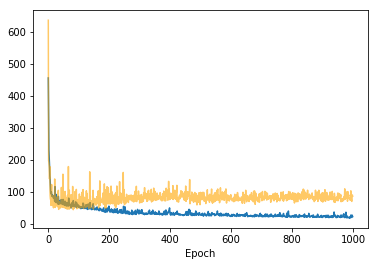

In [138]:
plt.plot(range(1000), hist.history['loss'])
plt.plot(range(1000), hist.history['val_loss'], color = 'orange', alpha = 0.6)
plt.xlabel('Epoch')
plt.show()